In [7]:
import nltk
from collections import Counter
import glob
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Paths for all the different corpora
folderpaths = ['../AnxietyMeditations/', '../SleepMeditations/',
               '../LearningAndGrowthMeditations/', '../MorningMeditations/']

#array to store the text of each file 
corpus = []

for folder in folderpaths:
    if folder == '../AnxietyMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
    elif folder == '../SleepMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
    elif folder == '../LearningAndGrowthMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)
    elif folder == '../MorningMeditations/':
        for doc in glob.glob(os.path.join(folder, '*.txt')):
            with open(doc, 'r') as f:
                text = f.read()
                corpus.append(text)

newStopWords = ['[', ']', '`', '#', '$',
                '(', ')', "Music", ':', "....", "--", ",", "''", '`', '"']
stopwords = set(stopwords.words('english') +
                newStopWords + list(string.punctuation))

# Tokenizing by word and filtering stopwords
all_tokens = [w for w in word_tokenize(text.lower()) if not w in stopwords]



In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    # Tokenize and lowercase
    tokens = [w for w in word_tokenize(text.lower()) if not w in stopwords]
    tokenized_corpus.append(tokens)


In [9]:
import os
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
# Preprocess the text data
tokenized_corpus = []
for text in corpus:
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokenized_corpus.append(tokens)

context_windows = []
window_size = 4  # Size of the context window

for sentence in tokenized_corpus:
    sentence_length = len(sentence)
    for i in range(sentence_length):
        # Extract the target word
        target_word = sentence[i]

        # Extract the context words within the window size
        context_words = []
        for j in range(max(0, i - window_size), min(sentence_length, i + window_size + 1)):
            if j != i:
                context_words.append(sentence[j])

        # Append the target word and its context words as a tuple
        # Convert context_words to tuple
        context_windows.append((target_word, tuple(context_words)))

# Train the Word2Vec model
model = Word2Vec(context_windows, window=5,
                 min_count=10, sg=0)  # CBOW approach

# Accessing trained word vectors
word_vector = model.wv['breathe']  # Get the word vector for a specific word
print(word_vector)

[-0.02653323  0.05852161  0.02017573  0.1153099   0.05651342 -0.04240022
  0.10008867  0.06135989 -0.09201974  0.00315122 -0.02239042 -0.11175106
  0.00291366 -0.04352164  0.01267677  0.04617912  0.01599739 -0.10696957
 -0.0088408  -0.24518044  0.00112012  0.10368763  0.11289176 -0.06273969
 -0.0327258   0.10308766 -0.0436478  -0.01422539 -0.15158582  0.02675248
  0.0566883   0.0450117   0.05689706 -0.01731101 -0.11099516  0.10280446
 -0.01515267 -0.00413648 -0.06110399 -0.12861285  0.09279277 -0.03426292
 -0.01301743 -0.04958991  0.09139542 -0.0283929  -0.08201457  0.06720281
  0.11337388  0.01212116 -0.01342705 -0.02875162  0.02750847  0.01119757
 -0.07837638  0.06387543  0.00919308 -0.0778852  -0.03149487 -0.03309042
  0.03080989  0.04782719  0.07188828  0.01544644 -0.03641949  0.02229595
 -0.12686552  0.02959929 -0.11498702 -0.02038725 -0.00524906  0.10749009
  0.00610576 -0.04100489  0.01839402 -0.00400722  0.03738354 -0.10490306
 -0.04024782 -0.04371351 -0.02251911 -0.06392628 -0

In [12]:
import os
import nltk
from gensim.models import Word2Vec

# Define the directory containing the text files
directory = "./txt Files/"

all_vectors = {}

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "r") as f:
            text = f.read()
            words = nltk.word_tokenize(text)
            for word in words:
                try:
                    word_vector = model.wv[word.lower()]
                    all_vectors[filename] = word_vector
                    # print(f"Word: {word}\nVector: {word_vector}\n")
                except KeyError:
                    continue
                    # print(f"Word '{word}' not in vocabulary.\n")

print(len(all_vectors['sight.txt']))


100


In [15]:
import numpy as np

# Define a function to compute cosine similarity distance matrix
def cosine_sim_matrix(vectors):
    vectors_array = np.array(vectors)
    if vectors_array.ndim < 2:
        # If vectors_array is 1D, add a new axis to make it 2D
        vectors_array = vectors_array[:, np.newaxis]
    cosine_sim = np.dot(vectors_array, vectors_array.T)
    cosine_sim /= np.linalg.norm(vectors_array, axis=1, keepdims=True)
    cosine_sim /= np.linalg.norm(vectors_array, axis=1, keepdims=True).T
    distance_matrix = 1 - cosine_sim
    return distance_matrix


# Compute the cosine similarity distance matrix for each list of vectors in the dictionary
distance_matrices = {}
for key, vectors_list in all_vectors.items():
    distance_matrix = cosine_sim_matrix(vectors_list)
    distance_matrices[key] = distance_matrix

# Print distance matrix for each key in the dictionary
for key, distance_matrix in distance_matrices.items():
    print(f"Distance matrix for {key}:")
    print(distance_matrix)


Distance matrix for sound.txt:
[[ 0.0000000e+00  2.0000000e+00  0.0000000e+00 ... -1.1920929e-07
  -1.1920929e-07  0.0000000e+00]
 [ 2.0000000e+00  0.0000000e+00  2.0000000e+00 ...  2.0000000e+00
   2.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00  2.0000000e+00  0.0000000e+00 ... -1.1920929e-07
   0.0000000e+00  0.0000000e+00]
 ...
 [-1.1920929e-07  2.0000000e+00 -1.1920929e-07 ...  5.9604645e-08
  -1.1920929e-07  0.0000000e+00]
 [ 0.0000000e+00  2.0000000e+00  0.0000000e+00 ... -1.1920929e-07
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  2.0000000e+00  0.0000000e+00 ...  5.9604645e-08
   0.0000000e+00  0.0000000e+00]]
Distance matrix for taste.txt:
[[-1.1920929e-07  0.0000000e+00 -1.1920929e-07 ...  2.0000000e+00
   0.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  5.9604645e-08 ...  2.0000000e+00
   0.0000000e+00  2.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0000000e+00
   0.0000000e+00  2.0000000e+00]
 ...
 [ 2.0000000e+00  2.0000000e+00  2.0

In [18]:
from sklearn.decomposition import PCA

distance_pca = {}

for key, distance_matrix in distance_matrices.items():
    # Perform PCA to reduce the dimensionality of the distance matrix
    pca = PCA(n_components=2)
    pca.fit(distance_matrix)
    distance_pca[key] = pca.transform(distance_matrix)

print(distance_pca['taste.txt'].shape)


(100, 2)


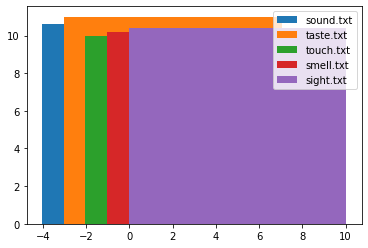

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# assume distance_pca is a dictionary mapping filenames to 2D arrays
# representing the pairwise distances between word vectors after PCA

fig, ax = plt.subplots()

# calculate mean distance between all pairs of points
mean_dist = np.mean([np.linalg.norm(distance_pca[key][i] - distance_pca[key][j]) 
                     for key in distance_pca 
                     for i in range(len(distance_pca[key])) 
                     for j in range(i+1, len(distance_pca[key]))])

# plot bar chart
for i, key in enumerate(distance_pca):
    x = i + 1
    y = [np.linalg.norm(p) for p in distance_pca[key]]
    ax.bar(x, height=y, width=mean_dist, label=key)

ax.legend()
plt.show()
